# Matplotlib
## Introduction
merci à F. Acero (AIM, CEA Saclay)

- Matplotlib est une bibliothèque Python dédiée à la visualisation graphique. Elle permet de créer des illustrations de qualité professionnelle adaptées à de nombreux formats et supports, aussi bien imprimés qu'interactifs, sur diverses plateformes.
- Matplotlib vise à simplifier l'accès aux tâches courantes tout en rendant les tâches complexes réalisables. En quelques lignes de code seulement, il est possible de créer des courbes, des histogrammes, des spectres de puissance, des graphiques en barres, des graphiques d'erreurs, et des diagrammes de dispersion.

##  Documentation en-ligne
Le site web [matplotlib.org](http://matplotlib.org) est la source principale pour la documentation. Il y a une [FAQ](http://matplotlib.org/stable/faq/index.html) et, très important, plein [d'exemples](https://matplotlib.org/stable/gallery/index.html).


In [2]:
import matplotlib.pyplot as plt  
import numpy as np

Des listes ne sont pas tres adapté pour le calcul numérique:

In [3]:
x = [1, 2, 3, 4, 5, 6]
y = x*2
print(f'length(x) = {len(x)}, length(y)={len(y)}')
print(x)
print(y)


length(x) = 6, length(y)=12
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]


Un plot rapide :

[1 2 3 4 5 6]
[ 1  4  9 16 25 36]
PHs83.gif.pdf           exos_equadiff.pdf       simple-plot.pdf
cours_C_gnuplot_V3.pdf  exos_integrales.pdf


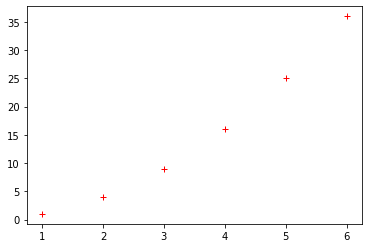

In [3]:
# Activation des graphiques intégrés - uniquement pour 
# utilisation dans les notebooks python.

# Commentez la ligne ci-dessous pour avoir des 
# graphiques dans une fenêtre séparée (par exemple, X11).

%matplotlib inline

x = np.array([1, 2, 3, 4, 5, 6])
y = x**2
print(x)
print(y)

plt.plot(x, y, 'r+')
plt.savefig('simple-plot.pdf') # marche aussi avec .ps, .png, .jpg, etc


%ls *pdf

C'est très simple d'ajouter une légende à une figure :

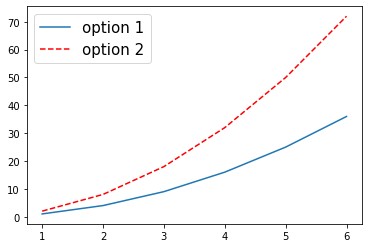

In [5]:
# Labels in legend can be added directly in the plot function.

plt.plot(x, y, label='option 1') 
plt.plot(x, y*2, 'r--', label='option 2')
plt.legend(loc='upper left', fancybox=True, fontsize=15)


# Pour plus de contrôle:  façon script vs façon orienté objet

### Façon script (vu ci-dessus).

Matplotlib propose deux types d'interface. L'interface scriptée, conçue pour ressembler à Matlab. Pour activer cela, Matplotlib maintient un pointeur vers la figure actuelle, l'axe actuel, etc. et dirige les commandes de niveau supérieur vers ces endroits :

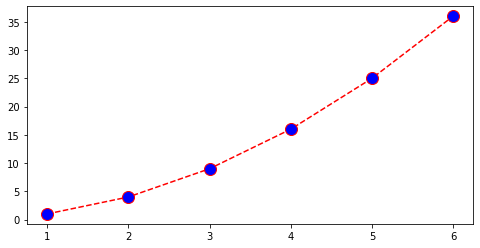

In [6]:
fig = plt.figure(figsize=(8, 4)) 
# All plotting is done through the Figure object,  the "canvas" of your plot.

plt.plot(x, y, color='red', marker='o', linestyle='dashed', markerfacecolor='blue', 
         markersize=12)
# on envoie toutes les détails à la fonction plot()


Text(0.5, 0, 'x')

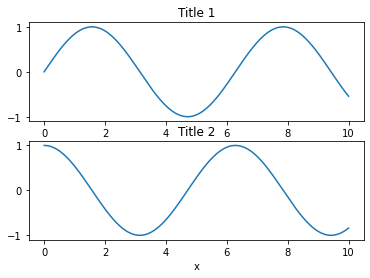

In [4]:
# creation d'une figure double en utilisant l'interface style matlab
x = np.linspace(0, 10, 1000)

#plt.subplot(nrows, ncols, current_plot_number)  Utilisation de la fonction subplot 
plt.subplot(2, 1, 1)  # 2 rangées, 1 colonne, premier plot
plt.plot(x, np.sin(x))
plt.title('Title 1')

plt.subplot(2, 1, 2)  # 2 rangées, 1 colonne, deuxième plot
plt.plot(x, np.cos(x))
plt.title('Title 2')  # La position du titre depend d'où se trouve la commande dans le code
plt.xlabel('x')


##  Orientée objet
Dans l'interface orientée objet, nous passons explicitement des références aux éléments du graphique avec lesquels nous souhaitons travailler :

Text(0.5, 1.0, "Ceci est le titre de l'axe 1!")

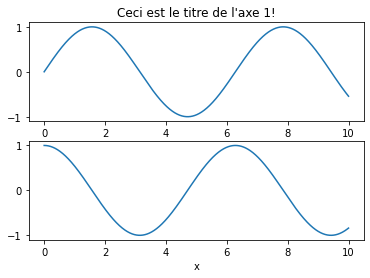

In [9]:
# creation de la même figure en utilisant l'interface orientée objet 
fig = plt.figure()

#ax1 c'est l'objet 

ax1 = fig.add_subplot(2, 1, 1)  #on veut ajouter des axes à la figure
ax1.plot(x, np.sin(x))
ax1.set_title("On ne vera pas ce titre")

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(x, np.cos(x))
ax2.set_xlabel('x')
ax1.set_title("Ceci est le titre de l'axe 1!")


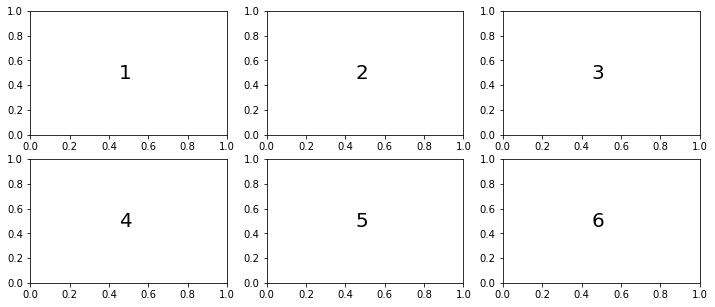

In [13]:
fig = plt.figure(figsize=(12,5))
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i) # on fait chaque axe un par un
    ax.text(0.45, 0.45, str(i), fontsize=20)


On peut egalement travailler avec un array d'axes :

<class 'numpy.ndarray'>    => Now ax is an array of axes objects
<class 'matplotlib.axes._subplots.AxesSubplot'>


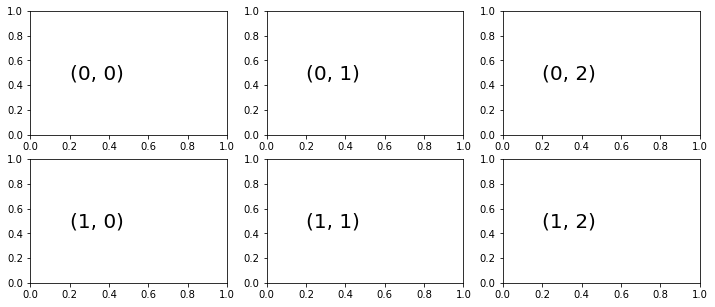

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(12,5)) # return the entire array of Axes object
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.2, 0.45, str((i, j)), fontsize=20)
        
print(type(ax), "   => ax est un array d'objets axes")
print(type(ax[0,0]))

### Certaines choses sont plus faciles a faire avec la méthode orientée objet, comme des axes partagés :

Text(0.5, 1.0, 'Easy inset plot !')

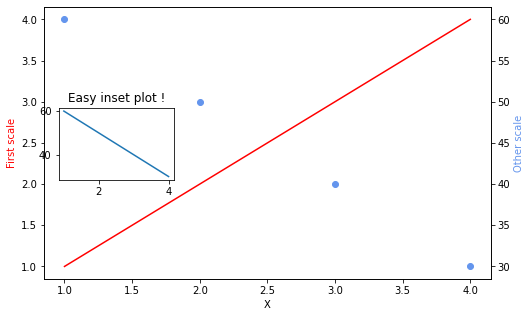

In [18]:

color1 = 'red'
color2 = 'cornflowerblue' 
# il existe pleins de couleurs marrants comme chartreuse, mintcream, 
# cornsilk, seashell, peachpuff, lemonchiffon

fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot([1, 2, 3, 4], [1, 2, 3, 4], color=color1)
ax1.set_xlabel('X')
ax1.set_ylabel('First scale', color=color1)

ax2 = ax1.twinx()
ax2.scatter([1, 2, 3, 4], [60, 50, 40, 30], color=color2)
ax2.set_ylabel('Other scale', color=color2)

ax_inset = fig.add_axes([0.15,0.4,0.2,0.2])
#[gauche, bas, largeur, hauteur] en fraction de la figure, pas des données
# C'est si simple d'ajouter une figure dans une autre !

ax_inset.plot([1, 2, 3, 4], [60, 50, 40, 30])
ax_inset.set_title('Easy inset plot !')



Voici la liste complète de couleurs disponibles :

In [21]:
import matplotlib.colors as mcolors

# Liste des couleurs disponibles
colors = list(mcolors.CSS4_COLORS.keys())


for color in colors:
    print(color)


aliceblue
antiquewhite
aqua
aquamarine
azure
beige
bisque
black
blanchedalmond
blue
blueviolet
brown
burlywood
cadetblue
chartreuse
chocolate
coral
cornflowerblue
cornsilk
crimson
cyan
darkblue
darkcyan
darkgoldenrod
darkgray
darkgreen
darkgrey
darkkhaki
darkmagenta
darkolivegreen
darkorange
darkorchid
darkred
darksalmon
darkseagreen
darkslateblue
darkslategray
darkslategrey
darkturquoise
darkviolet
deeppink
deepskyblue
dimgray
dimgrey
dodgerblue
firebrick
floralwhite
forestgreen
fuchsia
gainsboro
ghostwhite
gold
goldenrod
gray
green
greenyellow
grey
honeydew
hotpink
indianred
indigo
ivory
khaki
lavender
lavenderblush
lawngreen
lemonchiffon
lightblue
lightcoral
lightcyan
lightgoldenrodyellow
lightgray
lightgreen
lightgrey
lightpink
lightsalmon
lightseagreen
lightskyblue
lightslategray
lightslategrey
lightsteelblue
lightyellow
lime
limegreen
linen
magenta
maroon
mediumaquamarine
mediumblue
mediumorchid
mediumpurple
mediumseagreen
mediumslateblue
mediumspringgreen
mediumturquoise
mediumv

## Pourquoi utiliser une interface plutôt qu'une autre ?

Ces deux interfaces sont pratiques dans des circonstances différentes. Pour réaliser rapidement des graphiques simples, l'interface scriptée est souvent la plus simple. En revanche, lorsqu'il faut créer des graphiques plus sophistiqués, l'interface orientée objet est plus simple et plus puissante.



Notez que la plupart des commandes de ax.[commande] existent également avec plt.[commande]. Les fonctions de plot sont les mêmes :

plt.plot => ax.plot

mais les modificateurs des plots utilisent set_[commande] (cela peut être un peu déroutant...)

plt.xlabel => ax.set_xlabel



# pyplot contient plein d'autres fonctions:
En voici quelques exemples:

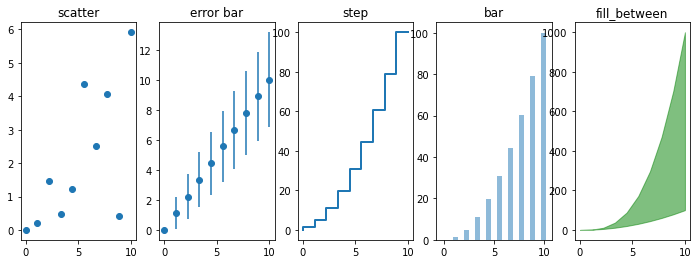

In [23]:
xx = np.linspace(0, 10, num=10)

fig, ax = plt.subplots(1, 5, figsize=(12,4))

ax[0].scatter(xx, xx*np.random.random(len(xx)))
ax[0].set_title("scatter")

ax[1].errorbar(xx, xx, yerr=np.sqrt(xx), fmt='o' )
ax[1].set_title("error bar")

ax[2].step(xx, xx**2, lw=2)
ax[2].set_title("step")

ax[3].bar(xx, xx**2, align="center", width=0.5, alpha=0.5)
ax[3].set_title("bar")

ax[4].fill_between(xx, xx**2, xx**3, color="green", alpha=0.5);
ax[4].set_title("fill_between");

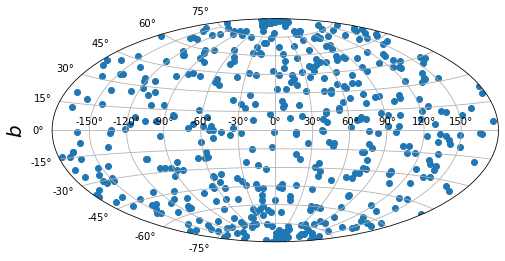

In [25]:
N = 500
l = np.random.uniform(low=-180, high=180, size=N) 
b = np.random.uniform(low=-90, high=90, size=N)   

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff") 
# projection='hammer', ''

ax.scatter(np.radians(l), np.radians(b) ) # Angles en radians.
ax.set_ylabel('$b$', fontsize=20)     # On peut utiliser Latex !!
ax.grid(True)


##  Images 2D, contours, and barres de couleur :

x shape = (20,)
X shape = (20, 20)
Z shape = (20, 20)


Text(0.5, 1.0, 'Que les contours de Z avec labels')

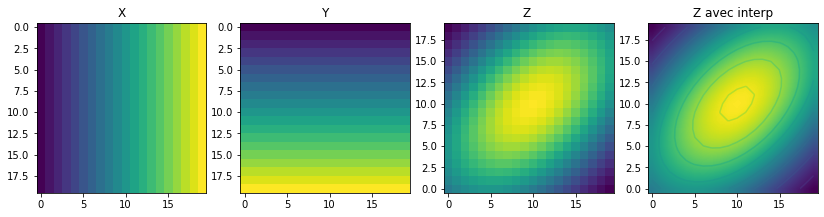

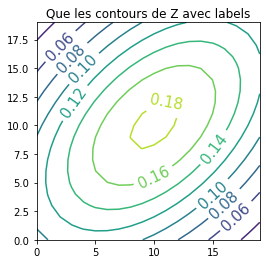

In [37]:
import scipy.stats as st
# on utilise scipy juste pour avoir une gaussienne 2D

# Définir les paramètres de la distribution gaussienne bivariée
moyenne = [0, 0]  # Valeurs moyennes pour X et Y
covariance = [[1, 0.5], [0.5, 1]]  # Matrice de covariance

# Créer un objet de distribution gaussienne multivariée
rv = st.multivariate_normal(moyenne, covariance)

delta = 0.1
x = np.arange(-1.0, 1.0, delta)
y = np.arange(-1.0, 1.0, delta)
print(f'x shape = {x.shape}')
X, Y = np.meshgrid(x, y)          # Python est sensible à la casse
print(f'X shape = {X.shape}')
pos = np.dstack((X, Y))

# Calculer les valeurs de la fonction de densité de probabilité (PDF) pour chaque point de la grille
Z = rv.pdf(pos)
print(f'Z shape = {Z.shape}')

fig, ax = plt.subplots(1, 4, figsize=(14,4))

ax[0].imshow(X)
ax[0].set_title('X')

ax[1].imshow(Y)
ax[1].set_title('Y')

ax[2].imshow(Z, origin='lower')
ax[2].set_title('Z ')

ax[3].imshow(Z, interpolation='bilinear', origin='lower')
ax[3].set_title('Z avec interp')
ax[3].contour(Z)



fig, ax = plt.subplots(1, 1, figsize=(4,4))
CS = ax.contour(Z)
ax.clabel(CS, inline=1, fontsize=15)
ax.set_title('Que les contours de Z avec labels')


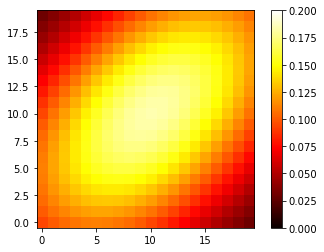

In [39]:
fig = plt.figure()
plt.imshow(Z,interpolation='none', origin='lower',
           vmin=0, vmax=0.2, cmap='hot')
plt.colorbar()  # Rajout de barre de couleur ultra facile
plt.show()

# La gallerie de Matplotib est une source extra pour vos figures

Si vous voulez creer une figure, le code existe probablement déjà !

Les exemples des figures sont classé par thème - faites un tour pour voir les possibilités.


https://matplotlib.org/stable/gallery/index.html
